# Krusell Smith

- Authored by Tim Munday 
- Comments and Additions by Tao Wang & Melih Firat

### KS

In the benchmark Krusell-Smith model, heterogeneity stems from the assumption that idiosyncratic income shocks are partially uninsurable. Each agent faces two types of uncertainty, 

- (i) whether the agent is employed or not (which is idiosyncratic);
- (ii) the aggregate state of the economy. There is only one type of consumer, which is infinitely lived. 

Where possible, we follow the notation of Krusell and Smith (1998).

Preferences of the agents are CRRA. 

Each agent is endowed with one unit of time, and supplies $l\epsilon$ units of labour in a given period. 

$\epsilon$ is stochartic and is either zero or one and denotes whether the agent is employed or unemployed. The agent can save and self insure by buying capital $k$ which is bounded below at the borrowing constraint of 0.

There is production of only one good, output ($y$), which follows a Cobb-Douglas production function using capital and labour. 

Variables with bars above denote aggregate variables: $y = z\bar{k}^\alpha \bar{l}^{1-\alpha}$. 

$z$ denotes the aggregate shock to productivity. $z$ can take two values, either $z_g$ which denotes a "good" state, or $z_b$ which denotes a "bad" state. Consumers gain income from the rental return on capital and labour, both of which are paid their marginal products.

The aggregate shocks follow first-order Markov chains, with the transition probability of moving from state $s$ to state $s'$ denoted by $\pi_{ss'}$. The aggregate shocks and individual shocks are correlated. That is the probability of being unemployed is different in good and bad times.(Tao)

We assume that the individual shocks satisfy the law of large numbers, such that the number of agents who are unemployed in the good state always equals $u_g$ and $u_b$ in the bad state. That means given the aggregate state, individual shocks are independent from each other.

For the individual, the probability of moving between a good state and employment to a bad state and unemployment is denoted $\pi_{gb10}$ with similar notations for the other transition probabilities.

The cross-section restrictions are $\forall \{s,s'\}=\{g,b\}\times\{g,b\}$, the following two conditions hold.(Tao)



$$\underbrace{\pi_{ss'01}}_{p(s \rightarrow s',ue \rightarrow em)}+\underbrace{\pi_{ss'00}}_{p(s \rightarrow s', ue \rightarrow ue)} = \underbrace{\pi_{ss'11}}_{p(s\rightarrow s', em \rightarrow em) }  + \underbrace{\pi_{ss'10}}_{p(s \rightarrow s', em \rightarrow ue)} = \underbrace{\pi_{ss'}}_{p(s\rightarrow s')}$$

$$u_s \frac{\pi_{ss'00}}{\pi_{ss'}}+ (1-u_s) \frac{\pi_{ss'10}}{\pi_{ss'}} = u_{s'}$$

Krusell and Smith have serially correlated unemployment. In our model we will simplify this and have unemployment be serially uncorrelated. 

Finally, denote $\Gamma$ as the current distribution of consumers over capital and employment status, and let $H$ be the law of motion of this distribution. 

The individual's problem is:
\begin{eqnarray*}
V(k, \epsilon; \Gamma, z) &=& max_{c, k'}\{U(c) + \beta E[V(k' ,\epsilon'; \Gamma', z')|z, \epsilon]\} \\
c + k' &=& r(\bar{k}, \bar{l}, z)k + w(\bar{k}, \bar{l}, z)l\epsilon + (1-\delta)k \\
\Gamma' &=& H(\Gamma, z, z') \\
k' &\geq& 0 \\
\end{eqnarray*}

Krusell and Smith then define a recursive competitive equilibrium as a law of motion $H$, a value function $V$, decision rule for updating capital $f$ and pricing functions $r$ and $w$, such that $V$ and $f$ solve the consumers problem, $r$ and $w$ denote the marginal productionns of capital and labour, and $H$ is consistent with $f$ (i.e. if we add up all of the individual agents capital choices we get the correct distribution of capital).

##### Discussion of the Algorithm (Tao)

In general, $\Gamma$ could be a high-dimensional object as it may include the whole distribution of individuals wealth in the economy. As each individual makes non-homogenous decision of saving for the next period, the change of total capital does not allow a linear aggregation. Therefore the law of motion $H$ is not a trivial function of the $\Gamma$. 

KS simplified this problem by the following logic. 

- As far as individual is concerned for her own decision, it is sufficient to know how the average capital is going to evolve as that is what determines the interest rate and wage in next period; 
- With bonded rationality assumption, it is okay to assume individual only tracks the first few moments of the wealth distribution;

So the iteration procedure goes like this:

1. Choose the number of moments to be included in the information set. In the simplistic case, only mean of total capital. KS call it $\Gamma_I$. 
2. Let individual guess a function form of the law of motion of these moments, $H_I$  and finds the optimal decision policy, $f_I$.
3. Use the optimal policy to simulate a history of aggregate capital with a great number of agents. 
4. Characterize the realized law of motion using the same moments. 
5. Compare it with the $H_I$, what is taken as given by individuals. 
6. Iterate till the two converge. 

After all of these, KS presents their findings: 
- a log-linear process of the first moment, average capital, $\bar k$ is good enough to approximate the aggregate transition.


** Not surprising, isn't it?** 

Anyway, the question has been all the way simplifed to the following:


\begin{eqnarray*}
V(k, \epsilon; \bar k, z) &=& max_{c, k'}\{U(c) + \beta E[V(k' ,\epsilon'; \bar k', z')|z, \epsilon]\} \\
c + k' &=& r(\bar{k}, \bar{l}, z)k + w(\bar{k}, \bar{l}, z)l\epsilon + (1-\delta)k; \\
 z=z_g \quad log\bar k' = a_0 + a_1 log\bar k; \\
 z=z_b  \quad  log\bar k' = b_0 + b_1 log\bar k ; \\
k' &\geq& 0 \\
\end{eqnarray*}





#### The Consumer

In [1]:
# Initial imports and notebook setup

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

import sys
import os
from copy import copy
from HARK.utilities import plotFuncs, plotFuncsDer
from HARK.ConsumptionSaving.ConsAggShockModel import *
import HARK.ConsumptionSaving.ConsumerParameters as Params

In [2]:
# Import Markov consumer type that allows aggregate shocks too

from HARK.ConsumptionSaving.ConsAggShockModel import AggShockMarkovConsumerType

In [3]:
# This cell defines a dictionary to make an instance of our Krusell-Smith consumer.
KSAgentDictionary = { 
    "CRRA": 1.0,                           # Coefficient of relative risk aversion
    "DiscFac": 0.99,                       # Intertemporal discount factor
    "LivPrb" : [1.0],                      # Survival probability
    "AgentCount" : 10000,                  # Number of agents of this type (only matters for simulation)
    "aNrmInitMean" : 0.0,                  # Mean of log initial assets (only matters for simulation)
    "aNrmInitStd"  : 0.0,                  # Standard deviation of log initial assets (only for simulation)
    "pLvlInitMean" : 0.0,                  # Mean of log initial permanent income (only matters for simulation)
    "pLvlInitStd"  : 0.0,                  # Standard deviation of log initial permanent income (only matters for simulation)
    "PermGroFacAgg" : 1.0,                 # Aggregate permanent income growth factor (only matters for simulation)
    "T_age" : None,                        # Age after which simulated agents are automatically killed
    "T_cycle" : 1,                         # Number of periods in the cycle for this agent type
# Parameters for constructing the "assets above minimum" grid
    "aXtraMin" : 0.001,                    # Minimum end-of-period "assets above minimum" value
    "aXtraMax" : 20,                       # Maximum end-of-period "assets above minimum" value               
    "aXtraExtra" : [None],                 # Some other value of "assets above minimum" to add to the grid
    "aXtraNestFac" : 3,                    # Exponential nesting factor when constructing "assets above minimum" grid
    "aXtraCount" : 24,                     # Number of points in the grid of "assets above minimum"
# Parameters describing the income process
    "PermShkCount" : 1,                    # Number of points in discrete approximation to permanent income shocks - no shocks of this kind!
    "TranShkCount" : 1,                    # Number of points in discrete approximation to transitory income shocks - no shocks of this kind!
    "PermShkStd" : [0.],                   # Standard deviation of log permanent income shocks - no shocks of this kind!
    "TranShkStd" : [0.],                   # Standard deviation of log transitory income shocks - no shocks of this kind!
    "UnempPrb" : 0.0,                      # Probability of unemployment while working - no shocks of this kind!
    "UnempPrbRet" : 0.00,                  # Probability of "unemployment" while retired - no shocks of this kind!
    "IncUnemp" : 0.0,                      # Unemployment benefits replacement rate
    "IncUnempRet" : 0.0,                   # "Unemployment" benefits when retired
    "tax_rate" : 0.0,                      # Flat income tax rate
    "T_retire" : 0,                        # Period of retirement (0 --> no retirement)
    "BoroCnstArt" : 0.0,                   # Artificial borrowing constraint; imposed minimum level of end-of period assets   
    "cycles": 0,                           # Consumer is infinitely lived
    "PermGroFac" : [1.0],                  # Permanent income growth factor
# New Parameters that we need now    
    'MgridBase': np.array([0.1,0.3,0.6,
                           0.8,0.9,0.98,
                           1.0,1.02,1.1,
                           1.2,1.6,2.0,
                           3.0]),          # Grid of capital-to-labor-ratios (factors)
    'MrkvArray': np.array([[0.875,0.125],
                           [0.125,0.875]]),# Transition probabilities for macroecon. [i,j] is probability of being in state j next
                                           # period conditional on being in state i this period. 
    'PermShkAggStd' : [0.0,0.0],           # Standard deviation of log aggregate permanent shocks by state. No continous shocks in a state.
    'TranShkAggStd' : [0.0,0.0],           # Standard deviation of log aggregate transitory shocks by state. No continuous shocks in a state.
    'PermGroFacAgg' : 1.0
}

In [4]:
KSAgent = AggShockMarkovConsumerType(**KSAgentDictionary)

Now we invoke $\text{IncomeDstn}$ Method of the $\text{KSAgent}$ to fill the income distribution information. 

Notice that we normalized transitory shocks by the probability of staying unemployment. So that in both good state or bad state, the income from given employed is the equal to 1. (Tao)

In [5]:
KSAgent.IncomeDstn[0] = [[np.array([0.96,0.04]),np.array([1.0,1.0]),np.array([1.0/0.96,0.0])],
                                      [np.array([0.90,0.10]),np.array([1.0,1.0]),np.array([1.0/0.90,0.0])]]
# A list of lists, one for each aggregate Markov state, each containing three arrays of floats, representing a discrete 
# approximation to the income process. Order: event probabilities, idiosyncratic permanent shocks, idiosyncratic transitory
# shocks. 

It is useful to better understand the structure of the inputs fed to $\text{IncomeDstn}$. (Tao)

- First, as a Markov type consumer may be faced with different discrete states of the world, the income shocks need to be given for each state, respectively. This is why we have _two_ lists of lists. 

- Second, in each state, there are two possible events: employment or unemploymnet. The first array of each list is the probability distribution over the two events and it has two elements. Therefore, correpondingly, both permanent and transitory shocks need to be eventwise. This is why we also have two elements for the permanent and transitory income shocks. (Tao)

Up to this point, individual agents are not ready to solve their decision problem yet. What is missing are essentially macro state variables: interest rate $r$ and $w$, both of which are functions of $z$ and $\bar k$. Also, the law of motion of $\bar k$, the linear function we discussed above. (Tao)

#### The Economy

In [6]:
from HARK.ConsumptionSaving.ConsAggShockModel import CobbDouglasMarkovEconomy

KSEconomyDictionary = {
    'PermShkAggCount': 1, 
    'TranShkAggCount': 1, 
    'PermShkAggStd': [0.0,0.0], 
    'TranShkAggStd': [0.0,0.0], 
    'DeprFac': 0.025, # Depreciation factor
    'CapShare': 0.36, # Share of capital income in cobb-douglas production function
    'DiscFac': 0.99,
    'CRRA': 1.0,
    'PermGroFacAgg': [1.0,1.0],
    'AggregateL':1.0, # Not sure on this. Looks like we have fixed the labour level...
    'act_T':1200, # Number of periods for economy to run in simulation
    'intercept_prev': [0.0,0.0], # Make some initial guesses at linear savings rule intercepts for each state
    'slope_prev': [1.0,1.0], # Make some initial guesses at linear savings rule slopes for each state
    'MrkvArray': np.array([[0.875,0.125],
                           [0.125,0.875]]), # Transition probabilities
    'MrkvNow_init': 0   # Pick a state to start in (we pick the first state)
}

KSEconomy = CobbDouglasMarkovEconomy(agents = [KSAgent], **KSEconomyDictionary) # Combine production and consumption sides into an "Economy"

We have now populated the $\text{KSEconomy}$ with $\text{KSAgents}$ defined before. That is basically telling the agents to take the macro state from the $\text{KSEconomy}$. 
Now we invoke the $\text{AggShkDstn}$ to feed the $\text{KSEconomy}$ with aggregate shocks. (Tao)

In [7]:
KSEconomy.AggShkDstn = [[np.array([1.0]),np.array([1.0]),np.array([1.01])],
                                 [np.array([1.0]),np.array([1.0]),np.array([0.99])]]

# Aggregate productivity shock distribution.  First element is probalities, given the state you are in. 
# Second element is agg permanent shocks (here we don't have any, so just they are just 1.).
# Third element is agg transitory shocks, which are calibrated the same as in Krusell Smith.

The structure of the inputs for $\text{AggShkDstn}$ follows the same logic of $\text{IncomeDstn}$. Now we only there is only one event happening in for each state, therefore, all arrays have only one input.  (Tao)

Now, we have fully defined the macro economy. It is time to let agents interact with the economy. We do it by invoking $\text{getEconomyData}$. (Tao)

Also, we generate the history of aggregate shocks by using $\text{makeAggShkHist}$. (Tao)

In [8]:
KSAgent.getEconomyData(KSEconomy) # Makes attributes of the economy, attributes of the agent

KSEconomy.makeAggShkHist() # Make a simulated history of the economy

# Solve macro problem by getting a fixed point dynamic rule

KSEconomy.solve() # Solve the economy using the market method. i.e. guess the saving function, and iterate until a fixed point

intercept=[-0.38266000690730878, -0.37779831427668004], slope=[1.0943006435744063, 1.0934356265328735], r-sq=[0.99990076300977626, 0.99981018501870222]
intercept=[-0.11933375285181119, -0.11859682468363927], slope=[1.002056729884891, 1.001894858579818], r-sq=[0.99999848532729274, 0.99999771392101167]
intercept=[-0.064703305547204146, -0.064571885825468994], slope=[1.005418108081318, 1.0053908441410313], r-sq=[0.99999999976275555, 0.99999999978792364]
intercept=[-0.34738561649884814, -0.35911408629299052], slope=[1.0789089579282567, 1.0831729490225988], r-sq=[0.99996536599126895, 0.99995159029925096]
intercept=[-0.088164352699138346, -0.087690940027663797], slope=[0.99766870152432374, 0.99756108477477146], r-sq=[0.999999951601929, 0.99999993719349034]
intercept=[-0.074651094501926724, -0.074600399178690102], slope=[1.0073883844293037, 1.0073782443454635], r-sq=[0.99999999930571937, 0.99999999935155315]
intercept=[-0.34396416683016739, -0.35680167556477077], slope=[1.0775335219960203, 1.

The last line above is the converged aggregate saving rule for good and bad times, respectively.

Aggregate savings as a function of aggregate market resources:


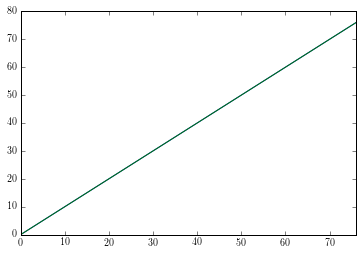

Wage rate as function of capital ratio:


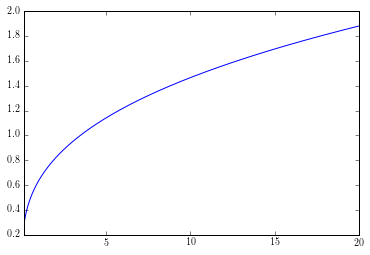

Interest factor as function of capital ratio


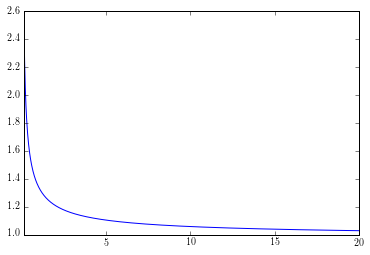

Consumption function at each aggregate market resources gridpoint (in general equilibrium):


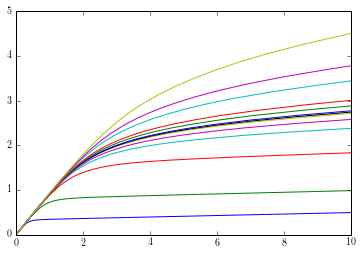

Saving at each individual market resources gridpoint (in general equilibrium):


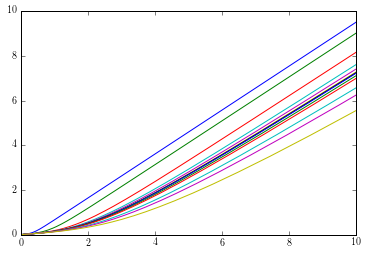

In [9]:
# Lets plot our results

print('Aggregate savings as a function of aggregate market resources:')
plotFuncs(KSEconomy.AFunc,0.1,2*KSEconomy.kSS)

print('Wage rate as function of capital ratio:')
plotFuncs(KSEconomy.wFunc, 0.1, 20) 

print('Interest factor as function of capital ratio')
plotFuncs(KSEconomy.Rfunc, 0.1, 20)

print('Consumption function at each aggregate market resources gridpoint (in general equilibrium):')
KSAgent.unpackcFunc()
m_grid = np.linspace(0,10,200)
KSAgent.unpackcFunc()
for M in KSAgent.Mgrid:
    c_at_this_M = KSAgent.solution[0].cFunc[0](m_grid,M*np.ones_like(m_grid)) #Have two consumption functions, check this
    plt.plot(m_grid,c_at_this_M)
plt.show()

print('Saving at each individual market resources gridpoint (in general equilibrium):')
KSAgent.unpackcFunc()
m_grid = np.linspace(0,10,200)
KSAgent.unpackcFunc()
for M in KSAgent.Mgrid:
    s_at_this_M = m_grid-KSAgent.solution[0].cFunc[1](m_grid,M*np.ones_like(m_grid))
    c_at_this_M = KSAgent.solution[0].cFunc[1](m_grid,M*np.ones_like(m_grid)) #Have two consumption functions, check this
    plt.plot(m_grid,s_at_this_M)
plt.show()

### Wealth Distribution in KS

#### Benchmark Model


In [10]:
sim_wealth = KSEconomy.aLvlNow[0]

print("The mean of individual wealth is "+ str(sim_wealth.mean()) + ";\n the standard deviation is "
      + str(sim_wealth.std())+";\n the median is " + str(np.median(sim_wealth)) +".")

The mean of individual wealth is 25.2595466865;
 the standard deviation is 5.12755806898;
 the median is 25.4484373625.


In [11]:
from HARK.utilities import getLorenzShares, getPercentiles
from HARK.cstwMPC.SetupParamsCSTW import SCF_wealth, SCF_weights


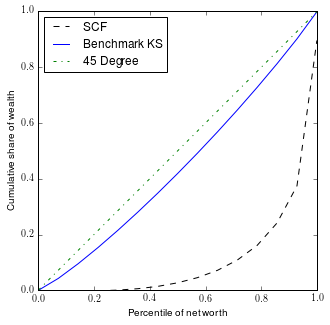

In [25]:
pctiles = np.linspace(0.001,0.999,15)
SCF_Lorenz_points = getLorenzShares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_Lorenz_points = getLorenzShares(sim_wealth,percentiles=pctiles)

# Plot 
plt.figure(figsize=(5,5))
plt.plot(pctiles,SCF_Lorenz_points,'--k',label='SCF')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Benchmark KS')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
plt.show()

In [13]:
lorenz_distance = np.sqrt(np.sum((SCF_Lorenz_points - sim_Lorenz_points)**2))
print("The Euclidean distanece of simulated wealth distribution and the estimates from sample is "+str(lorenz_distance) )

The Euclidean distanece of simulated wealth distribution and the estimates from sample is 1.44624205258


#### Stochastic Time Preference

KS assume that $\beta$ can take on three values, 0.9858, 0.9894, and 0.9930, and that the transition probabilities are such that 
- The invariant distribution for $\beta$’s has 80 percent of the population at the middle $\beta$ and 10 percent at each of the other $\beta$’s.
- Immediate transitions between the extreme values of $\beta$ occur with probability zero. 
- The average duration of the highest and lowest $\beta$’s is 50 years. 

As a first run, we alternatively assume that there are the $\beta$ is uniformly distributed over this range. We approximate the uniform distribution by seven points. 

In [31]:
from HARK.utilities import approxUniform

# Specify the distribution of the discount factor
num_types = 7              # number of types we want
DiscFac_mean   = 0.9858 # center of beta distribution 
DiscFac_spread = 0.0085    # spread of beta distribution
DiscFac_dstn = approxUniform(num_types, DiscFac_mean-DiscFac_spread, DiscFac_mean+DiscFac_spread)[1]
#DiscFac_dstn = np.array([0.9858,0.9894,0.9930])
BaselineType = deepcopy(KSAgent)

MyTypes = [] # initialize an empty list to hold our consumer types
for nn in range(len(DiscFac_dstn)):
    # Now create the types, and append them to the list MyTypes
    NewType = deepcopy(BaselineType)
    NewType.DiscFac = DiscFac_dstn[nn]
    NewType.seed = nn # give each consumer type a different RNG seed
    MyTypes.append(NewType)

In [32]:
KSEconomy_sim = CobbDouglasMarkovEconomy(agents = MyTypes, **KSEconomyDictionary) # Put all agents into the "Economy"
KSEconomy_sim.AggShkDstn = [[np.array([1.0]),np.array([1.0]),np.array([1.01])],
                                 [np.array([1.0]),np.array([1.0]),np.array([0.99])]]
for ThisType in MyTypes:
    ThisType.getEconomyData(KSEconomy_sim) # Makes attributes of the economy, attributes of the agent

KSEconomy_sim.makeAggShkHist() # Make a simulated history of the economy
KSEconomy_sim.solve() # Solve macro problem by getting a fixed point dynamic rule

**** WARNING: could not execute multiThreadCommands in HARK.core.Market.solveAgents(), so using the serial version instead. This will likely be slower. The multiTreadCommands() functions failed with the following error: 
     <class 'AttributeError'> : Can't pickle local object 'CobbDouglasEconomy.update.<locals>.<lambda>'
intercept=[-0.26990760116478246, -0.27377097290605917], slope=[1.0539523425223691, 1.0552816725390239], r-sq=[0.99998232741689275, 0.99995531883034083]
intercept=[-0.25482913680629138, -0.26284345985133556], slope=[1.0499219578493402, 1.0523163400095723], r-sq=[0.99994606328903246, 0.99984024422773654]
intercept=[-0.23573872595639284, -0.23821699428829352], slope=[1.0449905675097795, 1.0459118151384161], r-sq=[0.99992407823640561, 0.99978246058770259]
intercept=[-0.2469875503596316, -0.25188886507512603], slope=[1.0478695053494131, 1.0494337504098843], r-sq=[0.99996397000375203, 0.99991094269670222]
intercept=[-0.23701567333624018, -0.23805545137924872], slope=[1.045

In [33]:
aLvl_all = np.concatenate([KSEconomy_sim.aLvlNow[i] for i in range(len(MyTypes))])
print('Aggregate capital to income ratio is ' + str(np.mean(aLvl_all)))

Aggregate capital to income ratio is 40.7824836051


In [44]:
'''
for i in range(len(MyTypes)):
    plt.hist(KSEconomy_sim.aLvlNow[i],label=r'\beta='+str(DiscFac_dstn[i]))
plt.legend(loc=2)
'''

"\nfor i in range(len(MyTypes)):\n    plt.hist(KSEconomy_sim.aLvlNow[i],label=r'\x08eta='+str(DiscFac_dstn[i]))\nplt.legend(loc=2)\n"

Wealth Distribution of the Most Patient Type:


(array([  216.,   225.,   448.,   715.,   990.,  1191.,  1324.,  1431.,
         1551.,  1909.]),
 array([  1.95014178e-03,   4.57223554e-01,   9.12496966e-01,
          1.36777038e+00,   1.82304379e+00,   2.27831720e+00,
          2.73359061e+00,   3.18886403e+00,   3.64413744e+00,
          4.09941085e+00,   4.55468426e+00]),
 <a list of 10 Patch objects>)

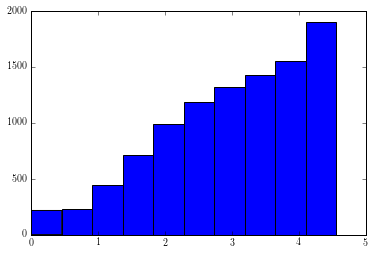

In [43]:
print('Wealth Distribution of the Most Patient Type:')
plt.hist(KSEconomy_sim.aLvlNow[0])

Wealth Distribution of the Most Impatient Type:


(array([    5.,    69.,   353.,  1122.,  2271.,  2913.,  2154.,   902.,
          188.,    23.]),
 array([ 199.53758788,  210.65118564,  221.7647834 ,  232.87838116,
         243.99197892,  255.10557669,  266.21917445,  277.33277221,
         288.44636997,  299.55996773,  310.67356549]),
 <a list of 10 Patch objects>)

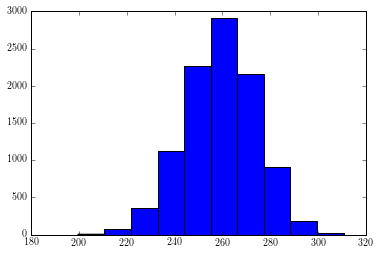

In [42]:
print('Wealth Distribution of the Most Impatient Type:')
plt.hist(KSEconomy_sim.aLvlNow[-1])

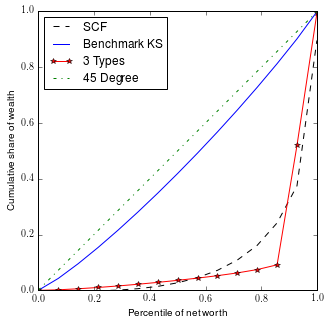

In [52]:
sim_3beta_wealth = aLvl_all
pctiles = np.linspace(0.001,0.999,15)
sim_Lorenz_points = getLorenzShares(sim_wealth,percentiles=pctiles)
SCF_Lorenz_points = getLorenzShares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_3beta_Lorenz_points = getLorenzShares(sim_3beta_wealth,percentiles=pctiles)

## Plot
plt.figure(figsize=(5,5))
plt.plot(pctiles,SCF_Lorenz_points,'--k',label='SCF')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Benchmark KS')
plt.plot(pctiles,sim_3beta_Lorenz_points,'-*r',label='3 Types')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
plt.show()

### Heterogeneity in MPC 

In [20]:
# Write a function to tell us about the distribution of the MPC in this code block, then test it!
# You will almost surely find it useful to use a for loop in this function.
def describeMPCdstn(SomeTypes,percentiles):
    MPC_sim = np.concatenate([ThisType.MPCnow for ThisType in SomeTypes])
    MPCpercentiles_quarterly = getPercentiles(MPC_sim,percentiles=percentiles)
    MPCpercentiles_annual = 1.0 - (1.0 - MPCpercentiles_quarterly)**4
    
    for j in range(len(percentiles)):
        print('The ' + str(100*percentiles[j]) + 'the percentile of the MPC is ' + str(MPCpercentiles_annual[j]))
        
#describeMPCdstn(MyTypes,np.linspace(0.05,0.95,19))